In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [7]:

data = pd.read_csv(r"C:\Users\Vamshi\Downloads\diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Handling Missing Values

In [8]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Data Normalization/Standardization

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.duplicated().sum()

0

In [13]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)

print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

#  Encoding Categorical Variables

In [14]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Outcome']))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])


scaled_data['Outcome'] = data['Outcome']

scaled_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,4.625929e-18,5.782412e-18,-1.272131e-16,2.602085e-17,4.672189e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.204774e+00,-7.646304e-01,-2.074100e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.699809e-01,-6.082010e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-4.699809e-01,-6.010905e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.112653e-01,6.297816e-01,5.058400e-01,3.090444e-01,6.038649e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.542658e+00,4.104082e+00,7.770285e+00,7.123206e+00,5.042883e+00,5.883565e+00,4.063716e+00,1.000000


#  Data Visualization

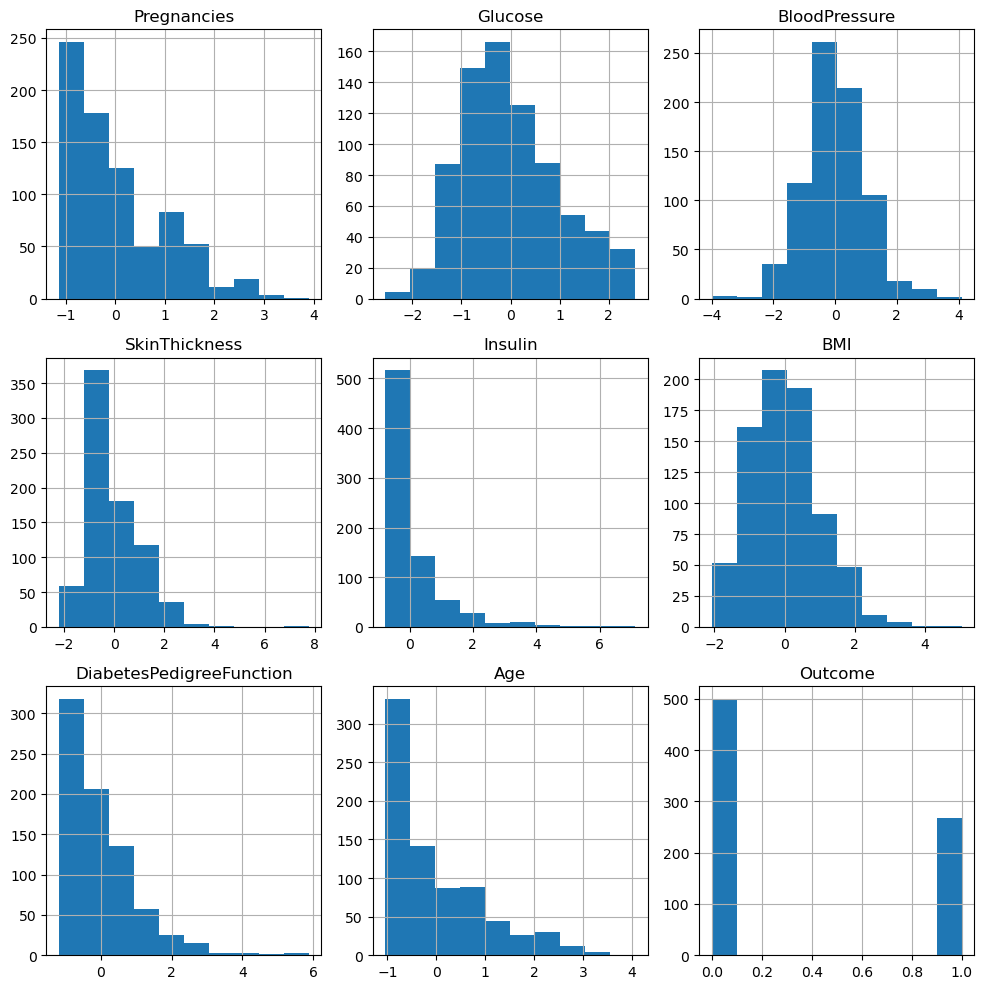

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of each feature
scaled_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()



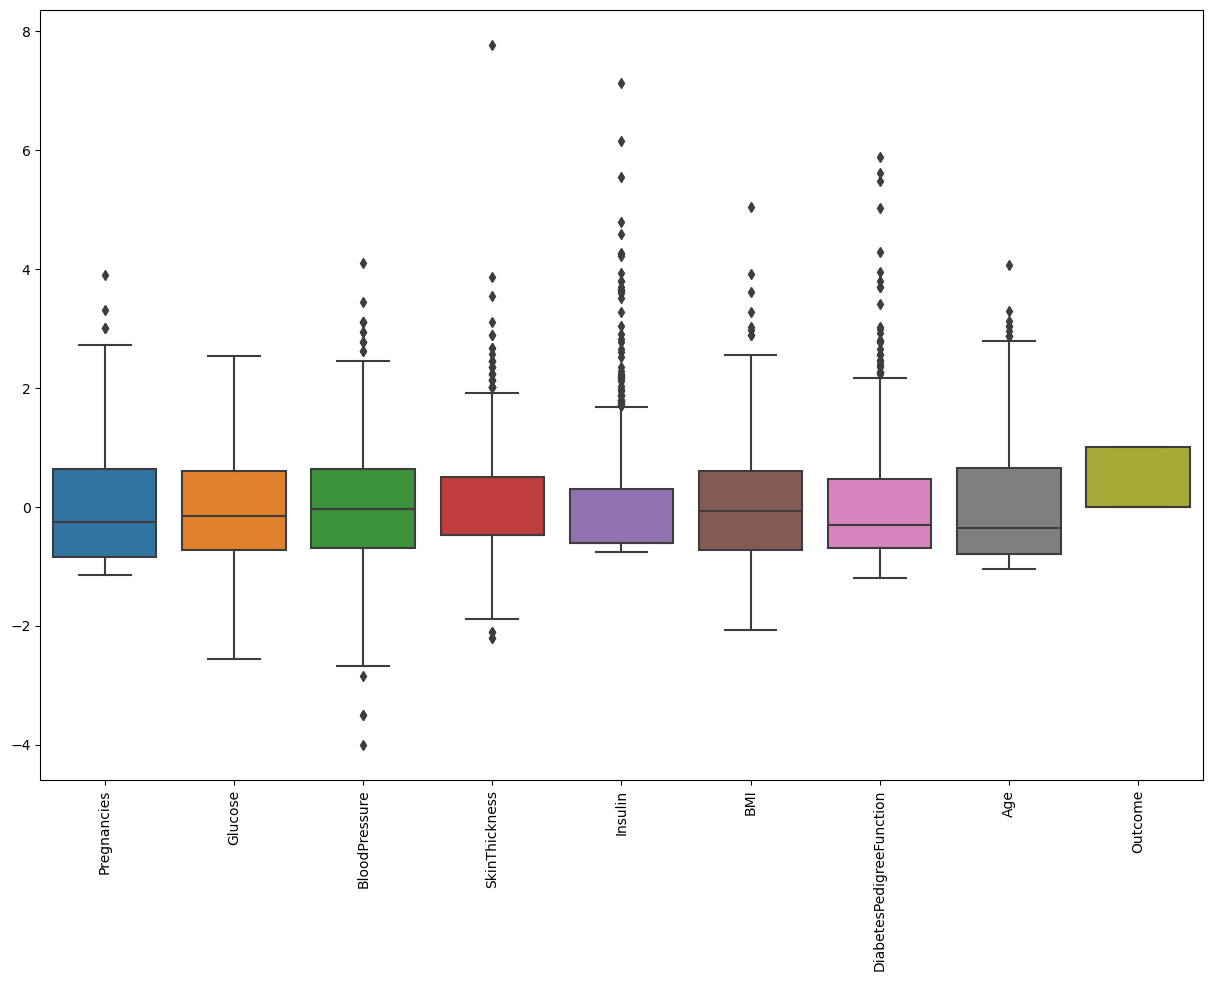

In [16]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_data)
plt.xticks(rotation=90)
plt.show()


# Correlation Analysis

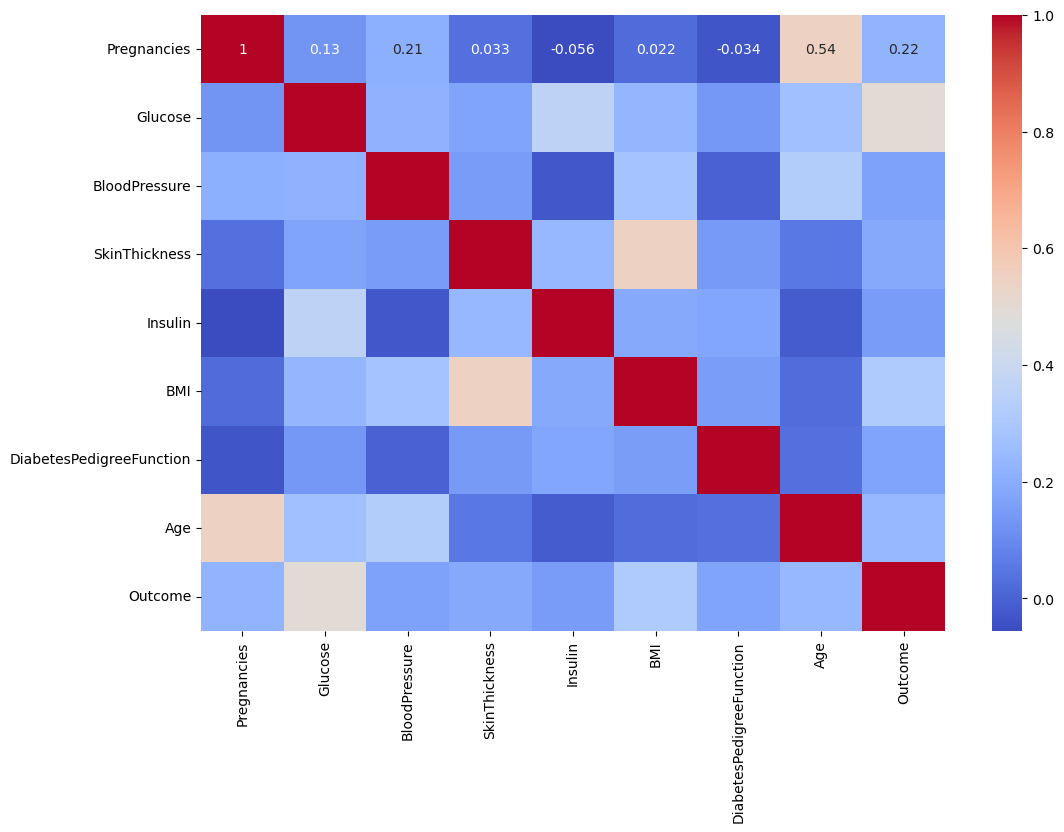

In [20]:
# Correlation matrix
correlation_matrix = scaled_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



# Feature Selection

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

X = scaled_data.drop(columns=['Outcome'])
y = scaled_data['Outcome']
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
selected_features


Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')

# Splitting Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


# Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC(probability=True)

# Train and evaluate each model
models = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree, 'Random Forest': random_forest, 'SVM': svc}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

results


{'Logistic Regression': {'Accuracy': 0.7597402597402597,
  'Precision': 0.6730769230769231,
  'Recall': 0.6363636363636364,
  'F1 Score': 0.6542056074766355,
  'ROC AUC': 0.8170798898071625},
 'Decision Tree': {'Accuracy': 0.6818181818181818,
  'Precision': 0.5576923076923077,
  'Recall': 0.5272727272727272,
  'F1 Score': 0.5420560747663552,
  'ROC AUC': 0.6474747474747475},
 'Random Forest': {'Accuracy': 0.7337662337662337,
  'Precision': 0.6206896551724138,
  'Recall': 0.6545454545454545,
  'F1 Score': 0.6371681415929203,
  'ROC AUC': 0.8165289256198347},
 'SVM': {'Accuracy': 0.7337662337662337,
  'Precision': 0.64,
  'Recall': 0.5818181818181818,
  'F1 Score': 0.6095238095238096,
  'ROC AUC': 0.8104683195592286}}

# Model Performance Visualization

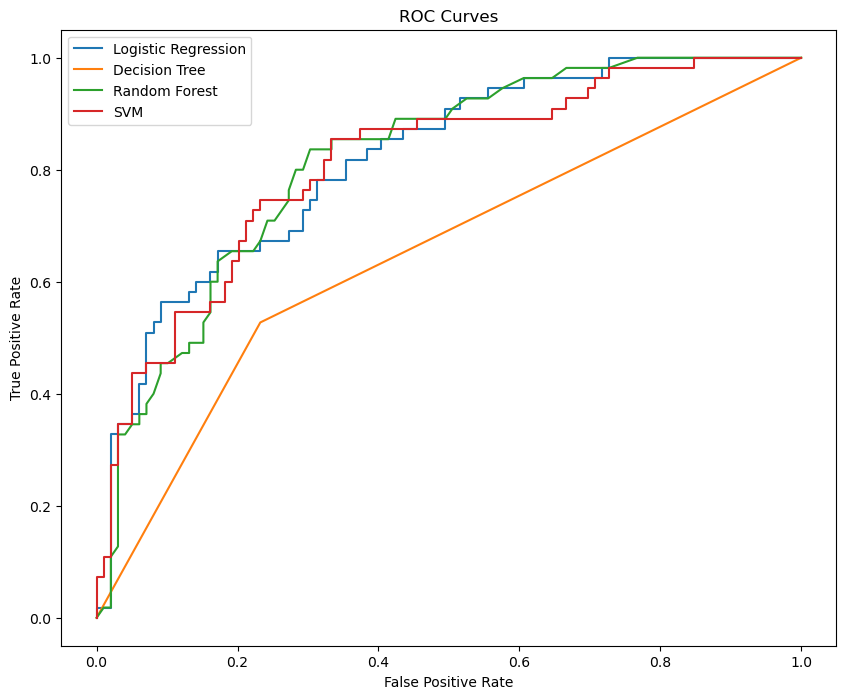

In [59]:
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()



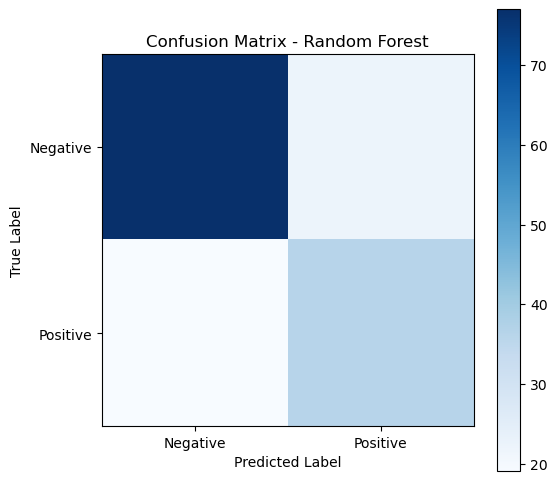

In [64]:

best_model = random_forest
conf_mat = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()


# Feature Importance

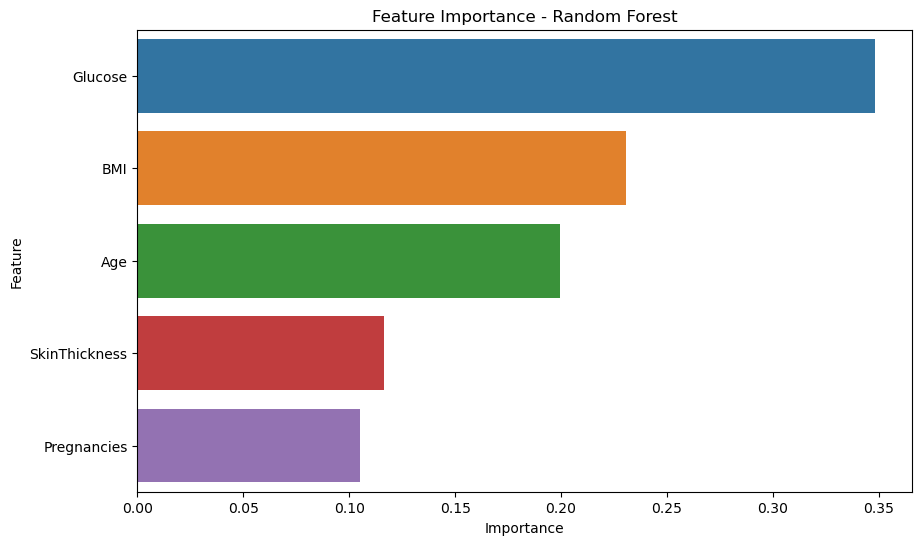

In [61]:

importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()
